Pytanie badawcze:

1. Descriptive analysis + data visualization (exploratory data analysis),
2. Classification along with detailed accuracy assessment,

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
sns.set_palette("magma")
plt.rcParams["figure.figsize"] = (25, 6)

# Introduction

This report focuses on Telco customer churn, aiming to discover what defining variables customers have that make them decide to part with their services. By delving into this analysis, we aim to uncover invaluable insights that can significantly impact a Telco's business strategy. The analysis will isolate elements to retain customers, adjust services to better meet customer needs, and potentially forecast and prevent churn before it occurs.

## Describing data

Let's load our data:

In [66]:
Data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [67]:
Data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [68]:
print(list(Data.columns))
print(Data.shape)

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
(7043, 21)


The CHURN data set contains 20 predictors worth of information on 7043 customers,
along with a target variable, churn, indicating whether the customer has given up (left the company) or not.

możemy usunąć customerID, bo to jest ID - nie potrzebne w dalszej analizie

In [69]:
Data = Data.drop(columns="customerID")

In [70]:
Data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Gender
Pierwszą cechą jest kolumna gender, która zawiera informacje o płci ?obserwacji?. W naszych danych cehca przyjmuje tylko dwie wartośći - female oraz male. Dane zawierają niemal po równo male i female





In [71]:
Data.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

(array([3488.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3555.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

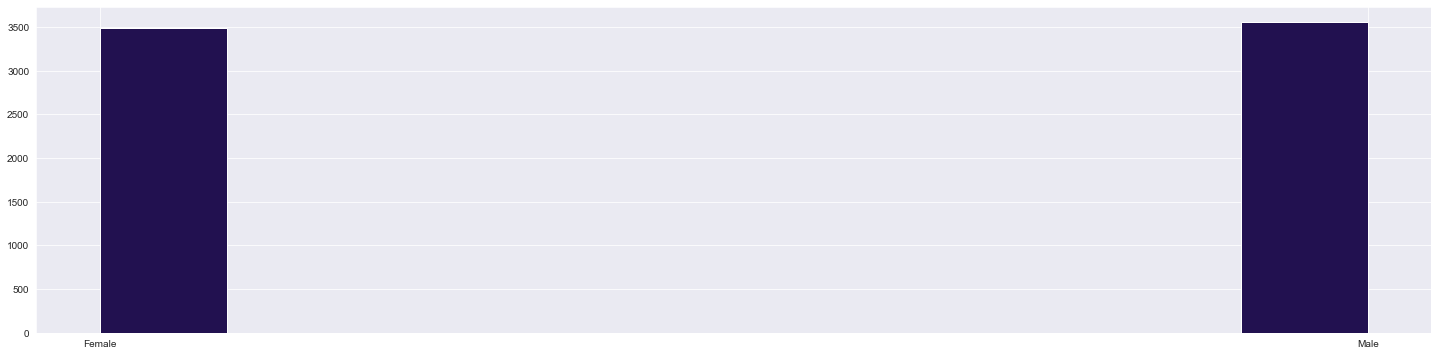

In [72]:
# Później będą ładniejsze
plt.hist(Data.gender)

### Senior Citizen
czy jest seniorem - 0 - nie, 1-tak. W tej kategorii mamy dysproporcję. Dane zawierają zdecydowanie więcej nie-seniorów, niż seniorów (niemal 6x więcej)

In [9]:
Data.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

### Partner
Informacja, czy osoba ?posiada partnera? - kategoria przyjmuje wartość No i Yes.

In [10]:
Data.Partner.value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

Porównywalna liczba obu kategorii

### Dependents
Informacja, czy osoba posiada osoby na utrzymaniu - kategoria przyjmuje wartość No i Yes. No jest 2x więcej niż Yes

In [11]:
Data.Dependents.value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

### Tenure
Zmienna ilościowa oznaczająca czas bycia klientem w firmie podawane w miesiącach

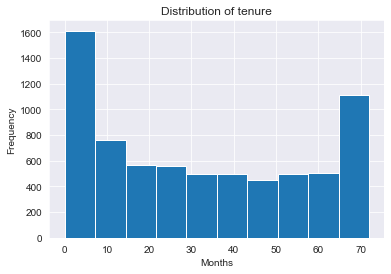

In [12]:
Data.tenure.hist()
plt.title("Distribution of tenure")
plt.xlabel("Months")
plt.ylabel("Frequency")
plt.show()

In [13]:
min(Data.tenure), max(Data.tenure)

(0, 72)

Dane zawierają wartości od 0 do 72 ---------- Czy 0 to brak danych czy po prostu 0? -----------------

### Phone Service
Zmienna kategoryczna infomująca o tym, czy użytkownik posiada phne service. Yes lub No

In [14]:
Data.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [15]:
len(Data.PhoneService[Data.PhoneService == "Yes"]) / len(Data)

0.9031662643759761

Ponad 90% użytokwników posiada Phone Service. Mamy tutaj wysoką dysproporcję.

### Multiple Lines
Features opisujący ___. Mamy tutaj 3 możliwe wartości - No, Yes i No phone Service, z czego ta ostatnia bardzo odstaje ilością od dwóch pozostałych.

In [16]:
Data.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [17]:
no_phone_service_from_multiplelines = Data.MultipleLines[
    Data.MultipleLines == "No phone service"
].index.to_list()


no_phone_Service = Data.PhoneService[Data.PhoneService == "No"].index.to_list()


no_phone_Service == no_phone_service_from_multiplelines

True

Dodatkowo sprawdziliśmy, czy wszyscy użytkownicy oznaczeni w kolumnie MultipleLines jako "no Phone service" również przyjmują wartość no w phone service. Nie znaleźliśmy tutaj różnic, więc w tym przypadku dane są spójne

### Internt Service

Informacja, jaki servis internetu posiada użytkownik, mamy dwa typy serwisu - DSL i Fiber optic oraz trzecia opcia - brak serwisu

In [18]:
Data.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

Kilka słów o proporcjach

### Online Security
Czy użytkownik ____. opcje - tak, nie i brak internet service

In [19]:
Data.OnlineSecurity.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [20]:
Data.OnlineSecurity[
    Data.OnlineSecurity == "No internet service"
].index.to_list() == Data.OnlineSecurity[Data.InternetService == "No"].index.to_list()

True

Dodatkowo upewniliśmy się, że mamy spójność z no internet service w kolumnie online secutity i internet service.

### Online Backup
...

In [21]:
Data.OnlineBackup.value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

### Device Protection

In [22]:
Data.DeviceProtection.value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

### Tech support

In [23]:
Data.TechSupport.value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

### Streaming TV

In [24]:
Data.StreamingTV.value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

### Streaming Movies

In [25]:
Data.StreamingMovies.value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [26]:
Data[Data.OnlineSecurity == "No internet service"].index.to_list() == Data[
    Data.OnlineBackup == "No internet service"
].index.to_list() == Data[
    Data.DeviceProtection == "No internet service"
].index.to_list() == Data[
    Data.TechSupport == "No internet service"
].index.to_list() == Data[
    Data.StreamingTV == "No internet service"
].index.to_list() == Data[
    Data.StreamingMovies == "No internet service"
].index.to_list()

True

Dodatkowo sprawdziliśmy, że istnieje 1526 obserwacji, które w kolumnach onlineSecurity, onlneBackup, DeviceProtection, techSupport, SteraingTV i SteeamingMovies przyjmują kategorię "No internet connection", co jest zgodne z kategorią no w Internet Service.

### Contract
Przyjmuje wartość Month-to-moth, One year i two-year, definujące rodzaj kontraktu podpisanego z użytkownikiem

In [27]:
Data.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

### PaperlessBilling

Czy użytkownik ma paperless billing - yes or not

In [28]:
Data.PaperlessBilling.value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

### Payment Method

In [29]:
Data.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

<AxesSubplot:>

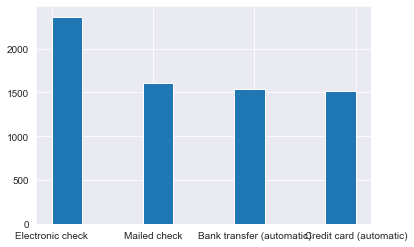

In [30]:
Data.PaymentMethod.hist()

### Monthly Charges

<AxesSubplot:>

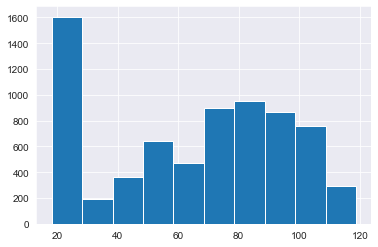

In [31]:
Data.MonthlyCharges.hist()

### Total Charges

In [32]:
Data.TotalCharges.astype(float)

ValueError: could not convert string to float: ''

### Churn

Zmienna która będziemy przewidzieć.

In [ ]:
Data.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

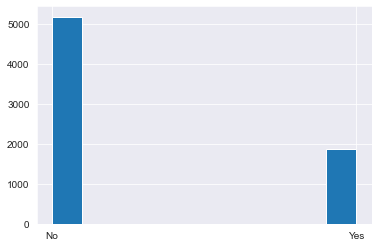

In [ ]:
Data.Churn.hist()

'', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'

# EDA

## NaNs

In [ ]:
np.sum(Data.isna())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
Data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
Data[["MonthlyCharges", "tenure", "TotalCharges"]]

,MonthlyCharges,tenure,TotalCharges
0,29.85,1,29.85
1,56.95,34,1889.5
2,53.85,2,108.15
3,42.30,45,1840.75
4,70.70,2,151.65
...,...,...,...
7038,84.80,24,1990.5
7039,103.20,72,7362.9
7040,29.60,11,346.45
7041,74.40,4,306.6


In [ ]:
from scipy.stats import pearsonr

In [ ]:
pearsonr(Data.MonthlyCharges * Data.tenure, Data.TotalCharges)

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

In [ ]:
Data.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


(array([7.34630129, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 2.65369871]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

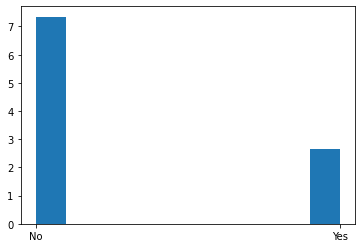

In [ ]:
plt.hist(Data.Churn, density=True)

(array([2421.,    0.,    0.,    0.,    0., 3096.,    0.,    0.,    0.,
        1526.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

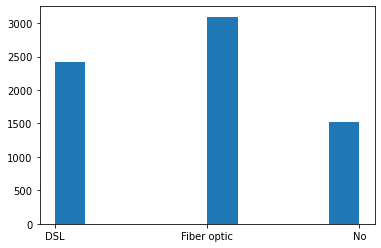

In [ ]:
plt.hist(Data.InternetService)